# Marketing Customer Analytics[EDA]

## PROJECT – DETAILS

PROJECT OUTLINE

This project is regarding analysis on Marketing Customer to understanding their behaviour on the marketing offers and their 
engagement. We would perform Exploratory Data Analysis to examine trends and correlations within our data.

GOALS:

 1. Clean the data to make it meaningful for statistical computing.
 2. Examine trends and correlations within the data
 3. Determine which features are most important for a churning customer.
TARGET VARIABLE: 
    RESPONSE – We would analyze customer behaviour and engagement pattern to various marketing offers offered.

In [53]:
##Reading the data file & import required libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\Rajani-janah\\Janah_Python project'

In [45]:
df=pd.read_csv(r"C:\Users\Rajani-janah\Desktop\Data Science\Python\Python Project\Marketing-Analysis_Janah.csv")

In [8]:
##Checking the data shape and type

df.shape

(9134, 24)

In [9]:
df.shape[0]

9134

In [10]:
df.shape[1]

24

In [11]:
type(df)

pandas.core.frame.DataFrame

In [27]:
## Checking total NULL values


df.apply(lambda x: sum(x.isnull()))

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
##Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [12]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [13]:
df.tail(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [54]:
##Rename Column Name

df=df.rename(columns={'Customer':'Customer_ID'})

In [55]:
df.columns

Index(['Customer_ID', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Engaged'],
      dtype='object')

In [29]:
##Finding unique values

df["Sales Channel"].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [17]:
df["Response"].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['State'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [56]:
##Rename TARGET variable values

df["Response"][df["Response"]=='No']='Not Responded'
df["Response"][df["Response"]=='Yes']='Responded'

In [57]:
##Count unique values in TARGET column

df.Response.value_counts()

Not Responded    7826
Responded        1308
Name: Response, dtype: int64

### Q1.What is the distribution of Marketing engagement?

Univariate Analysis - Categorical

It is an unbalanced data where 85.68% did not respond while only 14.32% responded to an offer.

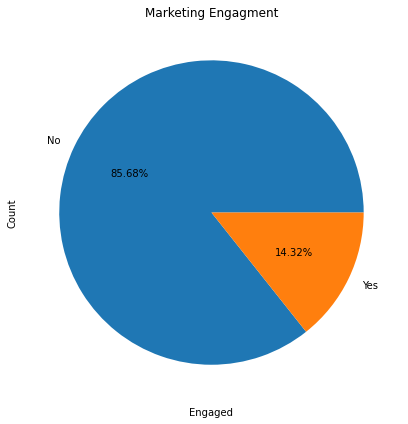

In [31]:
ax = df.groupby('Response').count()['Customer_ID'].plot(
    kind='pie',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment',
    autopct='%1.2f%%',
    
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [32]:
df.groupby('Response').count()['Customer_ID']/df.shape[0]*100

Response
No     85.679877
Yes    14.320123
Name: Customer_ID, dtype: float64

### Q2.What is the distribution of Gender?

Univariate Analysis - Categorical

In [33]:
bx = df.groupby('Gender').count()['Customer_ID'].plot(
    kind='Pie',
    title='gender count',
    autopct='%0.2f%%',
    
)

bx.set_xlabel('Gender')
bx.set_ylabel('Count')

plt.show()

ValueError: Pie is not a valid plot kind

### Q3.What is the distribution of customer engagement by Sales Channel?

Bivariate Analysis - Categorical vs Categorical

We see that there are more customers that did not engage with the marketing and the maximum who 
responded were the offer made by agents


In [23]:
contingency_table1 = pd.crosstab(df['Sales Channel'],df['Response'],margins = True)
contingency_table1

Response,Not Responded,Responded,All
Sales Channel,,,
Agent,2811,666,3477
Branch,2273,294,2567
Call Center,1573,192,1765
Web,1169,156,1325
All,7826,1308,9134


In [6]:
contingency_table2 = pd.crosstab(df['Sales Channel'],df['Response'])
contingency_table2

Response,No,Yes
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [17]:
stat,pval,dof,expected=chi2_contingency(contingency_table2)
pval

3.839111722102483e-23

In [18]:
alpha = 0.05
print("p value is " + str(pval))
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.839111722102483e-23
Dependent (reject H0)


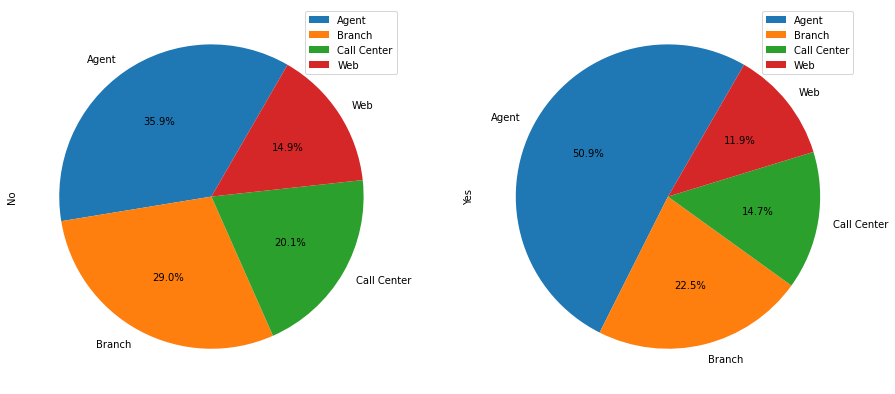

In [19]:
contingency_table2.plot(kind='pie',figsize=(15, 7),startangle=60,
    subplots=True,autopct='%1.1f%%')
plt.show()

### Q4. Is there any relationship between Policy Type and  Response?

Bivariate Analysis - Categorical vs Categorical

NULL Hypothesis (H0)--> There is no relation between the variables

Here, p value 0.4209189781652979 > 0.05 significance level. This means the variables are independent.
Hence, we fail to reject the null hypothesis

In [34]:
contingency_table3 = pd.crosstab(df['Policy Type'],df['Response'])
contingency_table3

Response,No,Yes
Policy Type,,
Corporate Auto,1680,288
Personal Auto,5830,958
Special Auto,316,62


In [35]:
stat,p,dof,expected=chi2_contingency(contingency_table3)

In [36]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4209189781652979
Independent (H0 holds true)


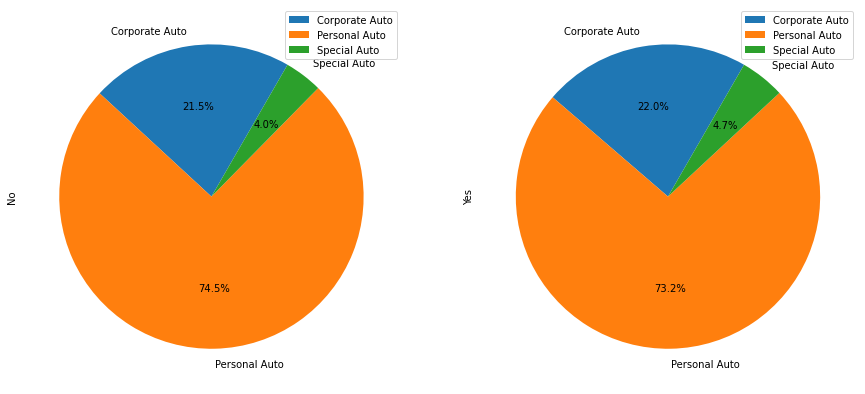

In [37]:
contingency_table3.plot(kind='pie',figsize=(15, 7),startangle=60,
    subplots=True,autopct='%1.1f%%')
plt.show()

### Q5. Is there any relationship between Gender and  Response?

Bivariate Analysis - Categorical vs Categorical

NULL Hypothesis (H0)--> There is no relation between the variables

Here, p value 0.6963314758009403 > 0.05 significance level. This means the variables are independent.
Hence, we fail to reject the null hypothesis

In [38]:
contingency_table4 = pd.crosstab(df['Gender'],df['Response'])
contingency_table4

Response,No,Yes
Gender,,
F,3998,660
M,3828,648


In [39]:
stat,pv,dof,expected=chi2_contingency(contingency_table4)
pv

0.6963314758009403

In [40]:
alpha = 0.05
print("p value is " + str(pv))
if pv <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.6963314758009403
Independent (H0 holds true)


### Q6.Are there any Outliers for Total Claim Amount by cutomer response?

Bivariate analysis - Categorical vs Numerical

Box plots are a good method to plot outliers. We surmise that there are outliers which are shown as dots.

In [47]:
##creating new column by changing categorical to numerical for analysis

df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'Not Responded' else 1)

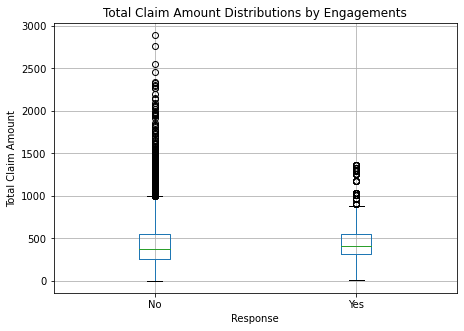

In [48]:
ax = df[['Response', 'Total Claim Amount']].boxplot(
    by='Response',showfliers=True,figsize=(7,5))
ax.set_xlabel('Response')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

### Q7. What is the response rate based on type of renewal offer and vehical class?

Multivariate Analysis - All Categorical

We see that customers has responded more to Offer 1 & 2.
Customers with medium range cars are more likely to respond to offers than customers with luxury cars. 

In [58]:
offer_Vehicle = df.loc[
    df['Response'] == 'Responded'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer_ID']/df.groupby('Renew Offer Type').count()['Customer_ID']*100

offer_Vehicle

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car     7.036247
                  Luxury Car        0.159915
                  Luxury SUV        0.479744
                  SUV               4.477612
                  Sports Car        1.119403
                  Two-Door Car      2.558635
Offer2            Four-Door Car    11.483254
                  Luxury Car        0.205058
                  Luxury SUV        0.410116
                  SUV               4.101162
                  Sports Car        1.640465
                  Two-Door Car      5.536569
Offer3            Four-Door Car     1.675978
                  Two-Door Car      0.418994
Name: Customer_ID, dtype: float64

In [59]:
offer_type = offer_Vehicle.unstack().fillna(0)
offer_type

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,7.036247,0.159915,0.479744,4.477612,1.119403,2.558635
Offer2,11.483254,0.205058,0.410116,4.101162,1.640465,5.536569
Offer3,1.675978,0.000000,0.000000,0.000000,0.000000,0.418994


In [60]:
contingency_table5 = pd.crosstab(df['Renew Offer Type'],df['Response'])
contingency_table5

Response,Not Responded,Responded
Renew Offer Type,,
Offer1,3158,594
Offer2,2242,684
Offer3,1402,30
Offer4,1024,0


In [61]:
stat,pv1,dof,expected=chi2_contingency(contingency_table5)
pv1

1.73695030654266e-118

In [62]:
alpha = 0.05
print("p value is " + str(pv1))
if pv1 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.73695030654266e-118
Dependent (reject H0)


In [63]:
contingency_table6 = pd.crosstab(df['Vehicle Class'],df['Response'])
contingency_table6

Response,Not Responded,Responded
Vehicle Class,,
Four-Door Car,3997,624
Luxury Car,151,12
Luxury SUV,154,30
SUV,1508,288
Sports Car,394,90
Two-Door Car,1622,264


In [64]:
stat,pv2,dof,expected=chi2_contingency(contingency_table6)
pv2

0.0007392131130991753

In [65]:
alpha = 0.05
print("p value is " + str(pv2))
if pv2 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0007392131130991753
Dependent (reject H0)


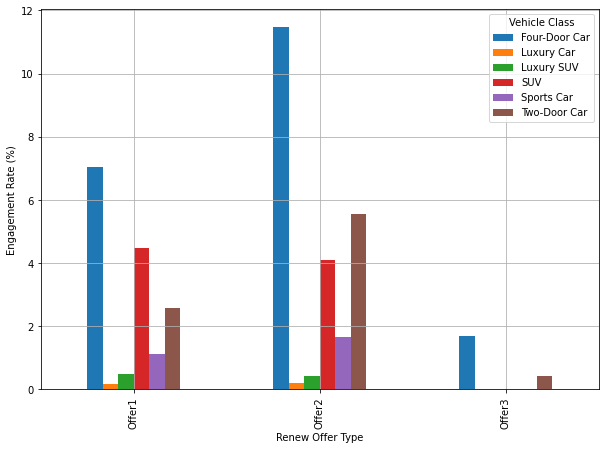

In [66]:
ab = (offer_type).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ab.set_ylabel('Engagement Rate (%)')

plt.show()

### Q8. Analyse the relation between all the variables

Multivariate Analysis -  All Numerical

We see that the variables - Income, Monthly premium Auto, Months since Policy Inception and Total claim amount 
have positive correlation. This means that these variables have direct effect on customer engagement.

In [50]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,NaN
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,NaN
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,NaN
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,NaN
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,NaN
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,NaN
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,NaN
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,NaN
Engaged,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
